In [1]:
%load_ext sql

In [2]:
%sql duckdb://

In [12]:
from pathlib import Path
from urllib.request import urlretrieve

if not Path("penguins.csv").is_file():
    urlretrieve(
        "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv",
        "penguins.csv",
    )

In [13]:
%%sql
SELECT * FROM "penguins.csv" LIMIT 3

Running query in 'duckdb://'

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,39.1,18.7,181,3750,MALE
Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
Adelie,Torgersen,40.3,18.0,195,3250,FEMALE


In [5]:
%%sql --save no_nulls --no-execute
SELECT *
FROM penguins.csv
WHERE body_mass_g IS NOT NULL

Running query in 'duckdb://'

Skipping execution...

<Axes: title={'center': "'body_mass_g' from 'no_nulls'"}, xlabel='body_mass_g', ylabel='Count'>

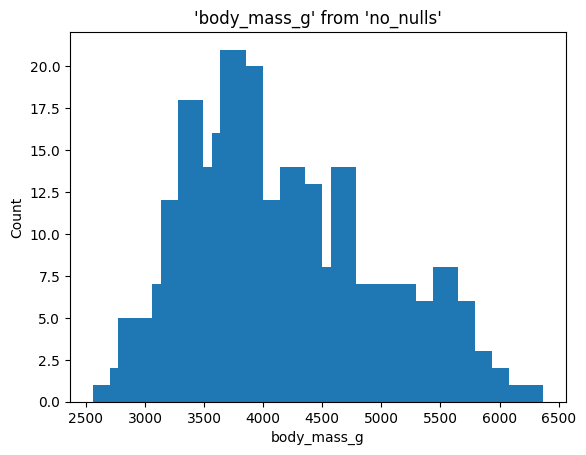

In [6]:
%sqlplot histogram --table no_nulls --column body_mass_g --with no_nulls

In [7]:
from pathlib import Path
from urllib.request import urlretrieve

if not Path("penguins.csv").is_file():
    urlretrieve(
        "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv",
        "penguins.csv",
    )

In [14]:
%%sql --save with_nulls --no-execute
SELECT *
FROM penguins.csv

Running query in 'duckdb://'

Skipping execution...

<Axes: title={'center': "'body_mass_g' from 'with_nulls'"}, xlabel='body_mass_g', ylabel='Count'>

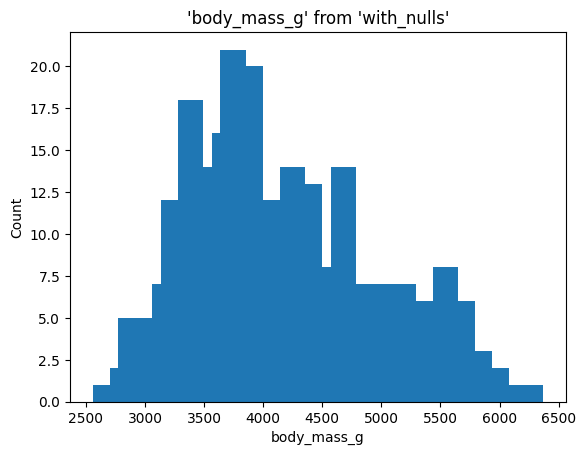

In [15]:
%sqlplot histogram --table with_nulls --column body_mass_g --with with_nulls

<Axes: title={'center': "Histogram from 'with_nulls'"}, ylabel='Count'>

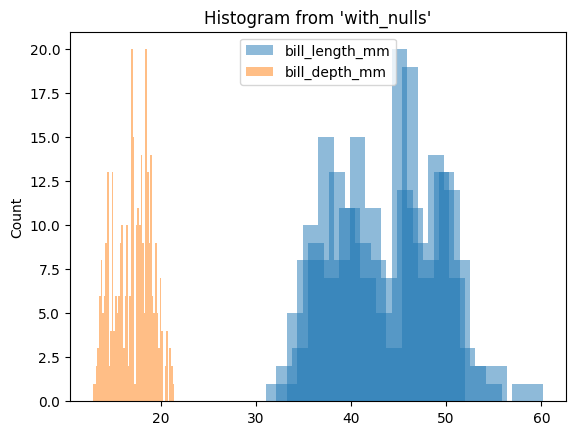

In [16]:
%sqlplot histogram --table with_nulls --column bill_length_mm bill_depth_mm --with with_nulls